In [1]:
using Plots

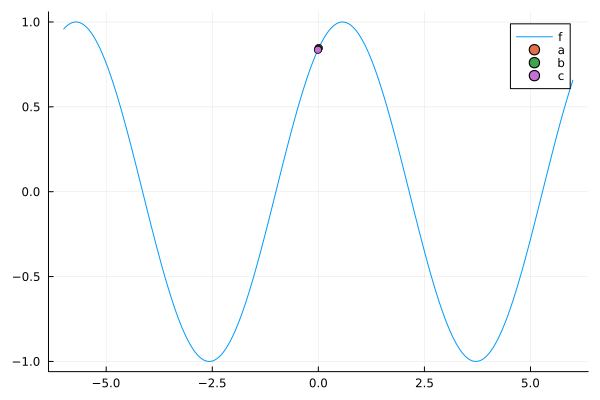

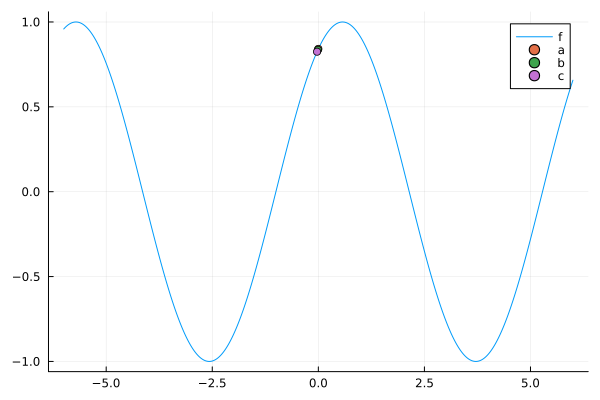

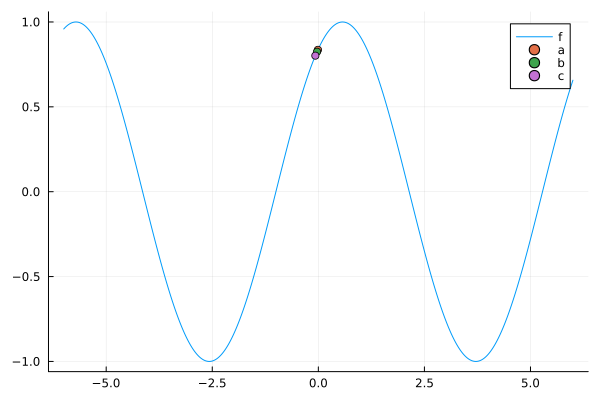

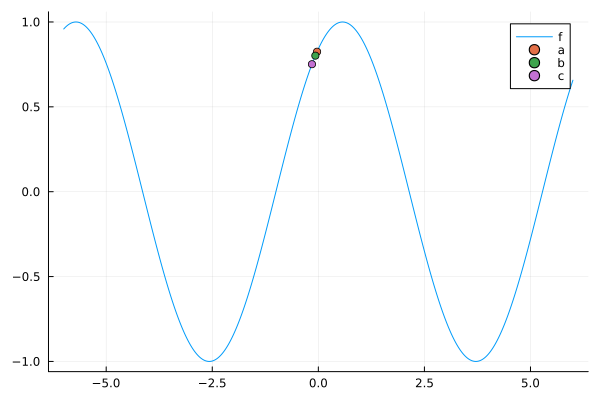

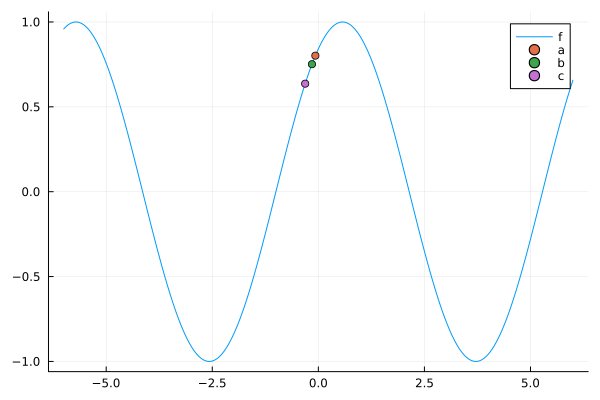

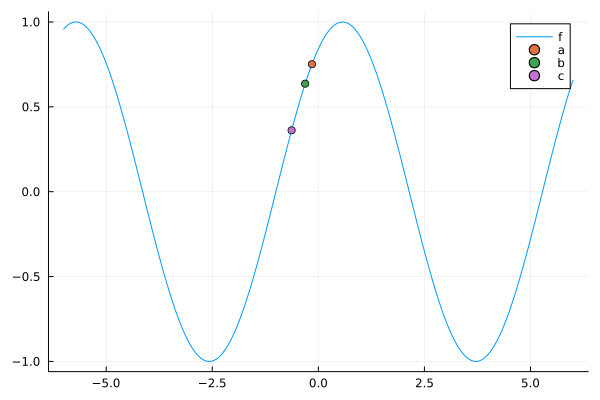

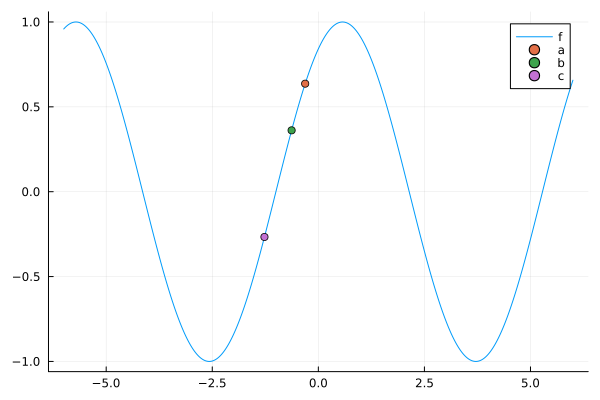

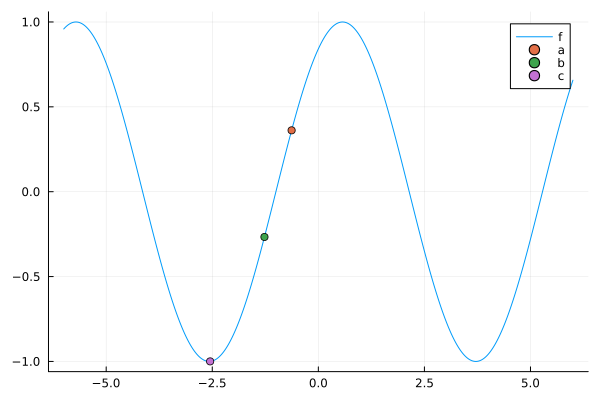

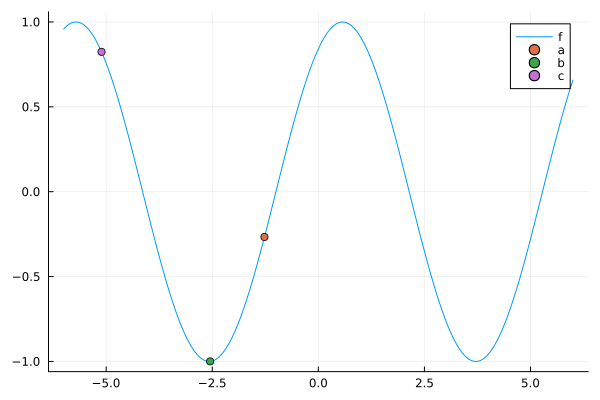

(-5.109999999999999, -1.27)

In [6]:

f(x) = sin(x+1)

ts = -6:0.01:6

function bracket_minimum(f, x=0; s=1e-2, k=2.0, n=20)
    a, ya = x, f(x)
    b, yb = a + s, f(a + s)
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    end
    i = 1
    for i in 1:n
        c, yc = b + s, f(b + s)
        fig = plot(ts, f.(ts); label="f")
        for (p, p_label) in [(a, "a"), (b, "b"), (c, "c")]
            scatter!(fig, [p], [f(p)]; label=p_label)
        end
        display(fig)
        if yc > yb
            return a < c ? (a, c) : (c, a)
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
        i += 1
    end
    return (NaN, NaN)
end
a, b = bracket_minimum(f)

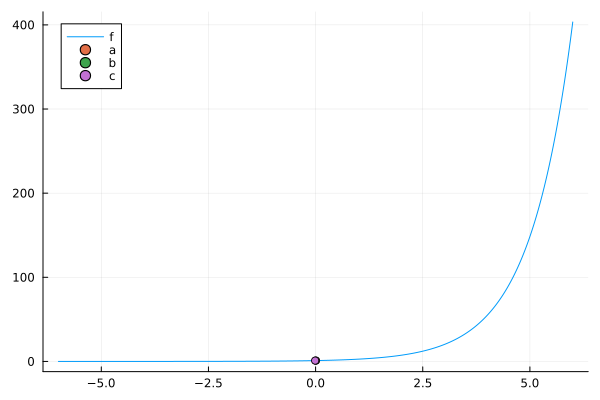

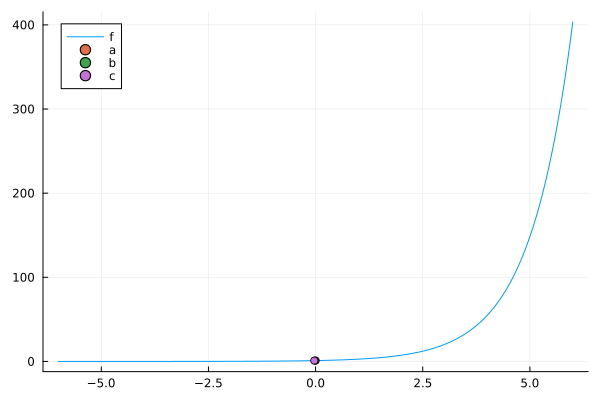

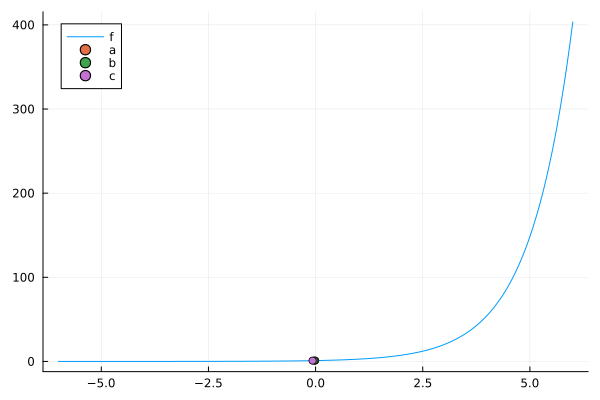

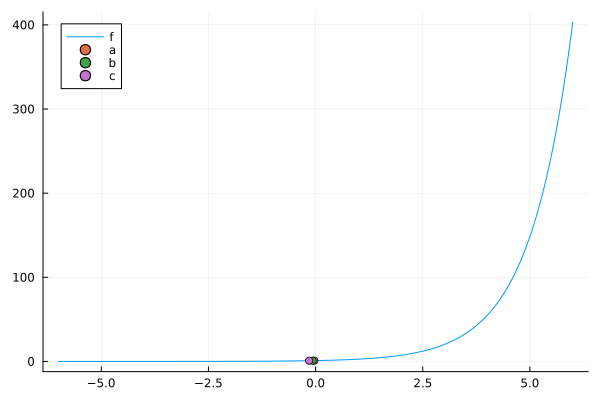

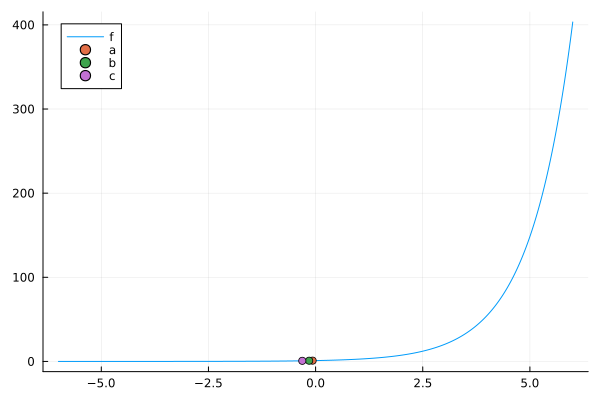

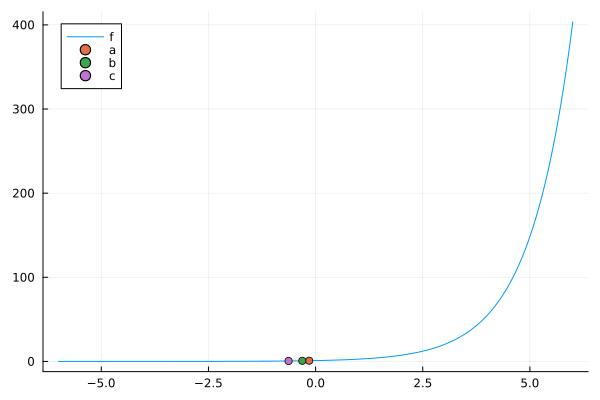

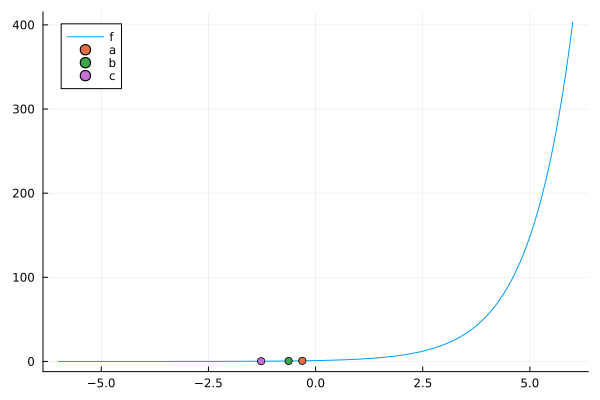

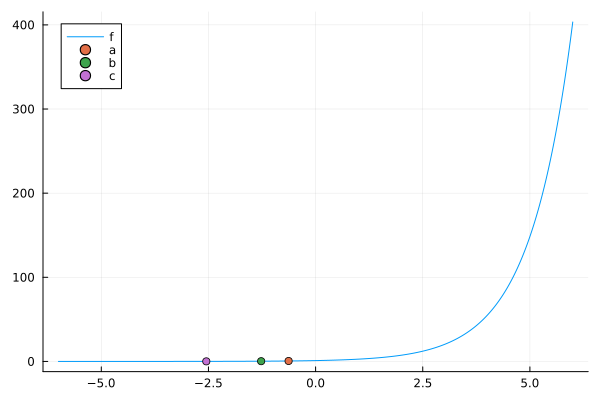

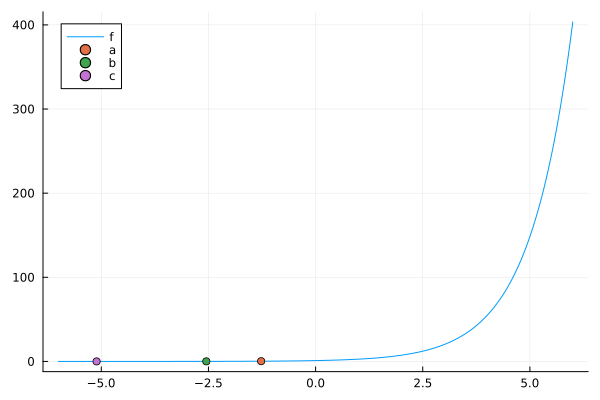

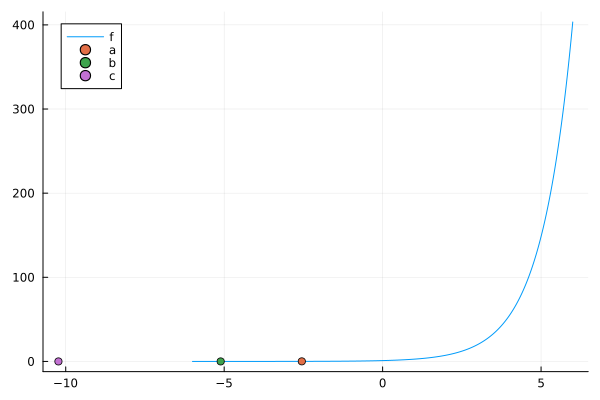

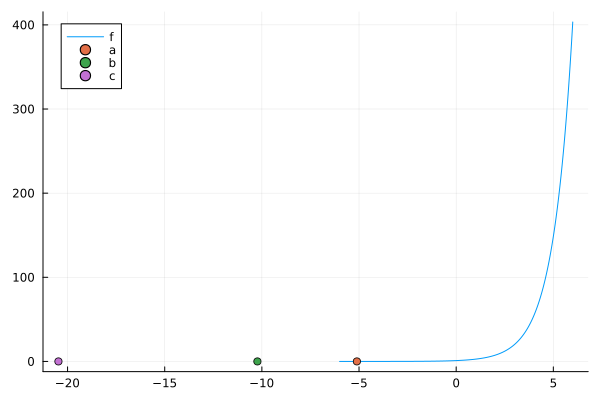

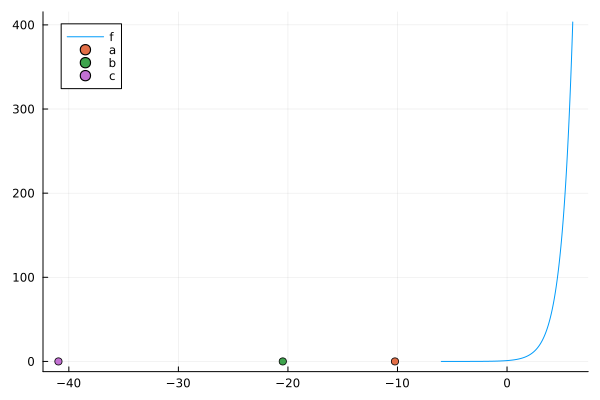

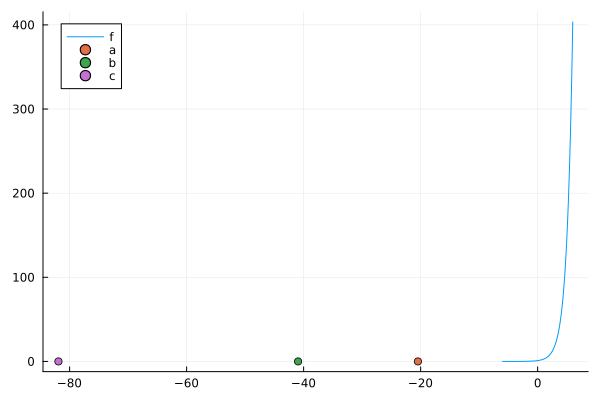

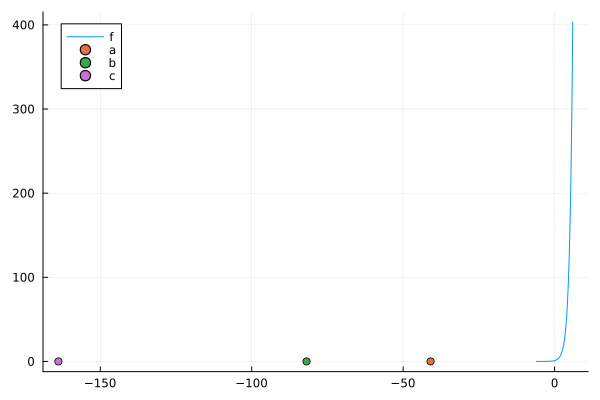

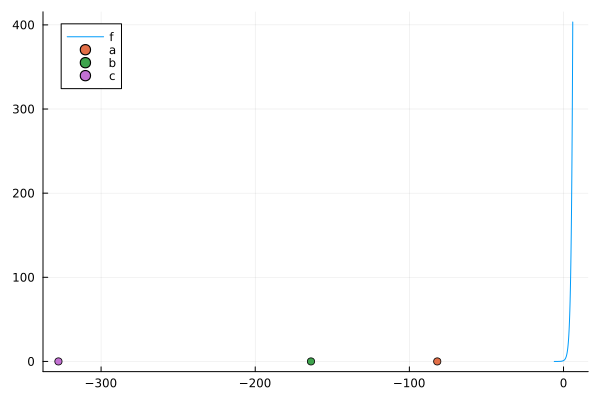

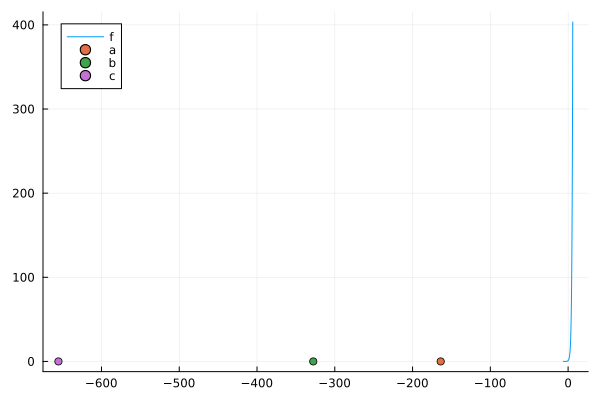

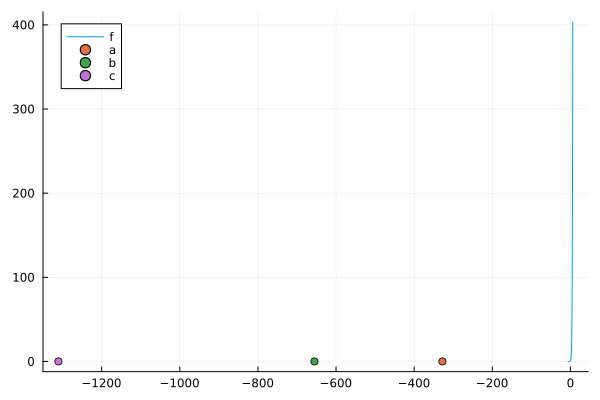

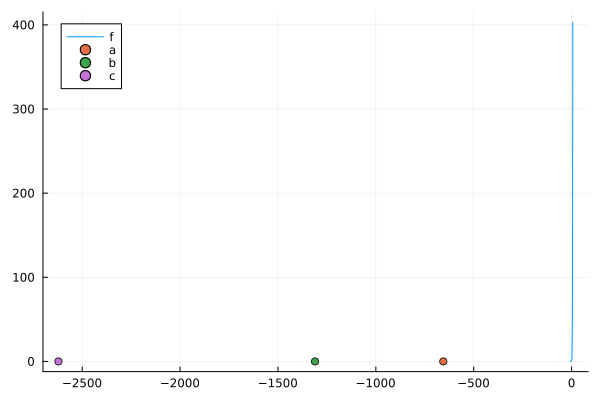

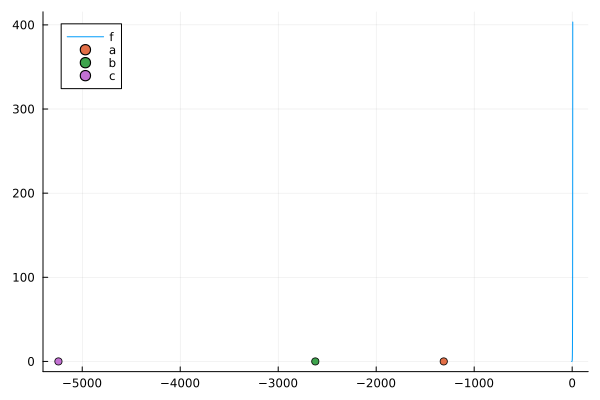

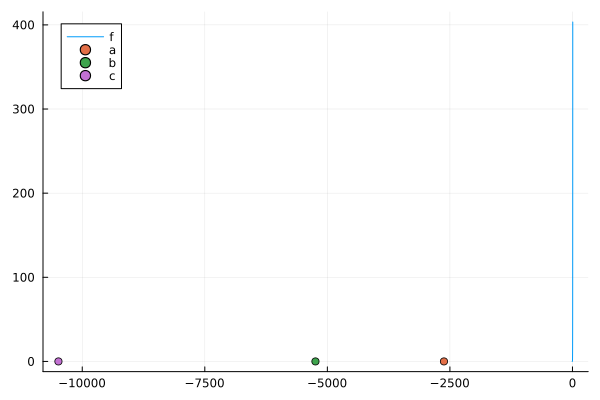

(NaN, NaN)

In [7]:
# Dla funkcji exp -- nie zbiega do minimum
a_exp, b_exp = bracket_minimum(exp)

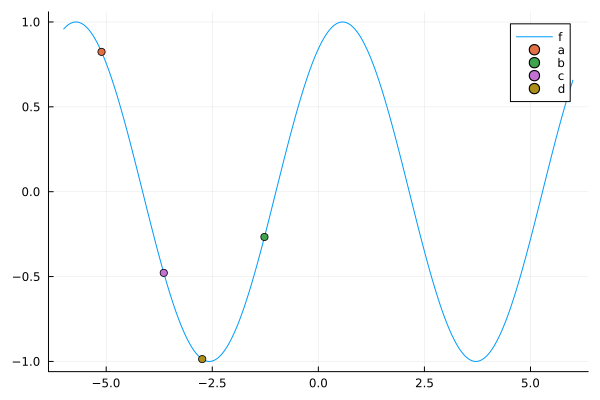

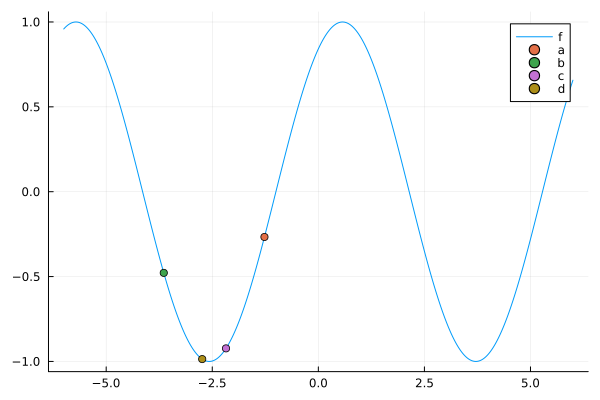

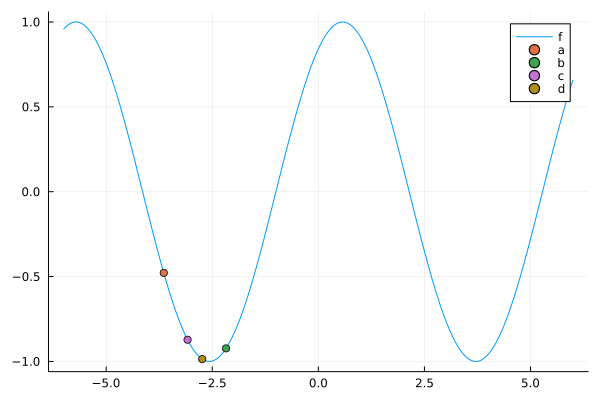

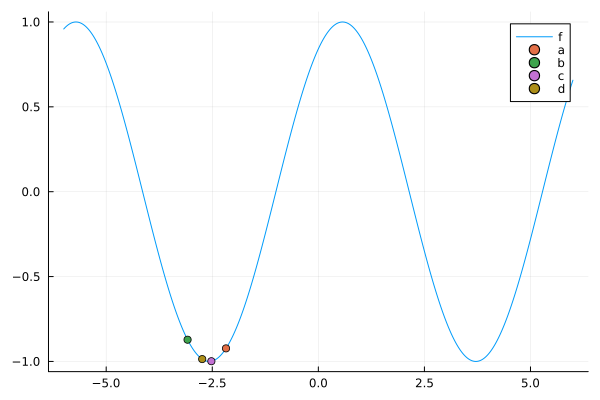

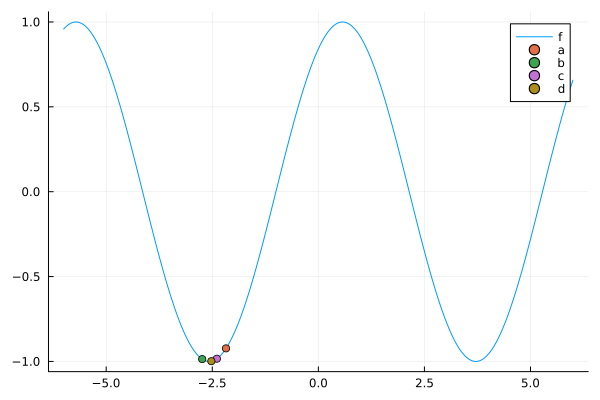

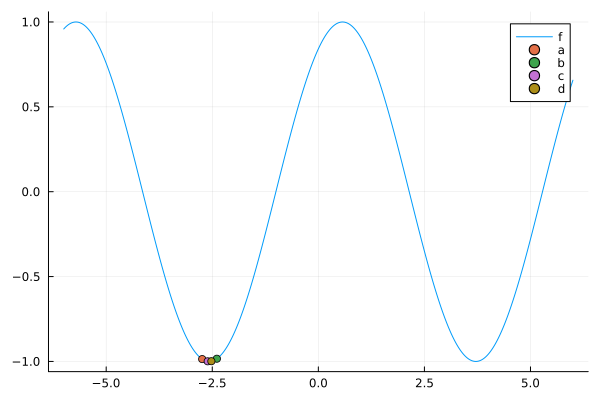

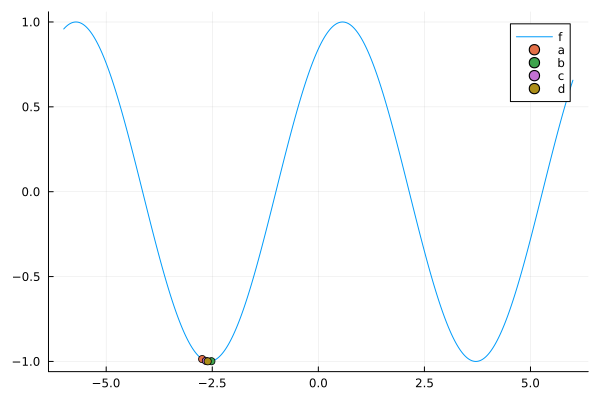

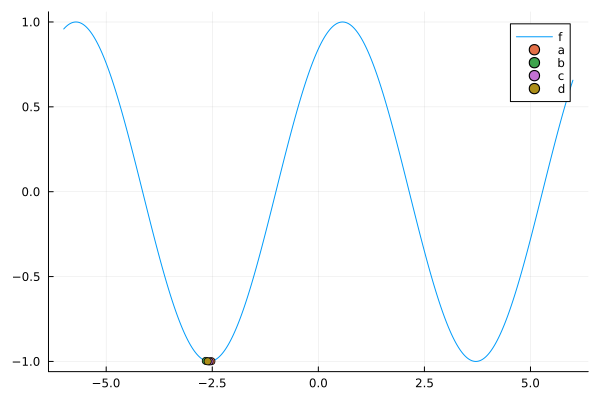

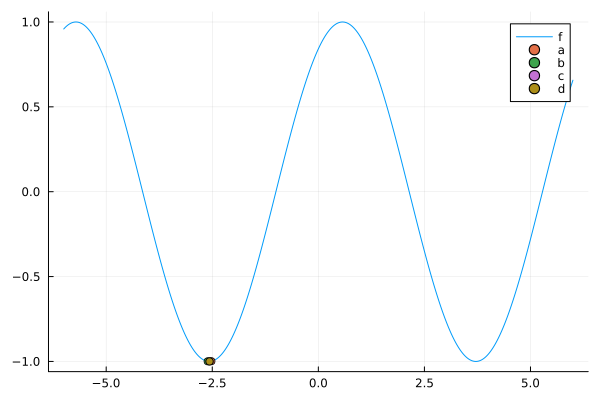

(-2.6075280898876403, -2.563950561797753)

In [8]:
function fibonacci_search(f, a, b, n; ε=0.01)
    φ = (1 + √5)/2
    s = (1-√5)/(1+√5)
    ρ = 1 / (φ*(1-s^(n+1))/(1-s^n))
    d = ρ*b + (1-ρ)*a
    yd = f(d)
    for i in 1 : (n-1)
        if i == n-1
            c = ε*a + (1-ε)*d
        else
            c = ρ*a + (1-ρ)*b
        end
        yc = f(c)

        fig = plot(ts, f.(ts); label="f")
        for (p, p_label) in [(a, "a"), (b, "b"), (c, "c"), (d, "d")]
            scatter!(fig, [p], [f(p)]; label=p_label)
        end
        display(fig)

        if yc < yd
            b, d, yd = d, c, yc
        else
            a, b = b, c
        end
        ρ = 1 / (φ*(1-s^(n-i+1))/(1-s^(n-i)))
    end
    return a < b ? (a, b) : (b, a)
end

fib_a, fib_b = fibonacci_search(f, a, b, 10)